Extract data from txt

In [ ]:

name = ["zihao", "tejas","nizar"]
gesture = ["nongesture","shield","grenade", "reload", "wave"]
TOTAL_DATA = [[], [], [], [], []]

batch = []
for i in range(0,3):
  for j in range(0,5):
        f = open(name[i] + gesture[j] + ".txt")
        print(name[i] + gesture[j] + ".txt")
        lines = f.readlines()
        for line in lines:
          if line != "\n" and line !="unpack requires a buffer of 20 bytes\n" and line != "attempting to connect 00:18:31:84:9F:AE\n" and line != "attempting to connect 30:E2:83:86:57:DA\n" and \
          line != "initiating handshake with 80:30:DC:D9:0C:E8\n":
            data_str = line[0:len(line) -1]
            if data_str[0:5] != "batch" and data_str[0:5] != "Batch":
              
              data_str = data_str.replace('(','').replace(')','')
              int_data = []
              batch_data = data_str.split(", ")
              for item in batch_data:
                int_data.append(int(item))
              batch.append(int_data)
            else:
              TOTAL_DATA[j].append(batch)
              batch = []
   

for i in range(0, 5):
  print(len(TOTAL_DATA[i]))



  
  
  

        







zihaonongesture.txt
zihaoshield.txt
zihaogrenade.txt
zihaoreload.txt
zihaowave.txt
tejasnongesture.txt
tejasshield.txt
tejasgrenade.txt
tejasreload.txt
tejaswave.txt
nizarnongesture.txt
nizarshield.txt
nizargrenade.txt
nizarreload.txt
nizarwave.txt
209
156
143
156
195


Visualise Data (Shield)

ax
156


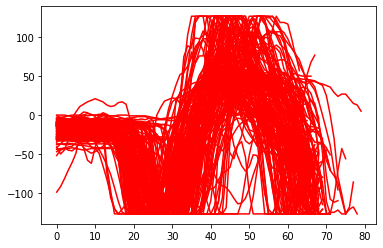

ay
156


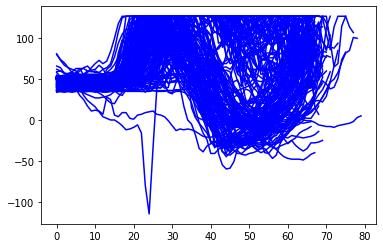

az
156


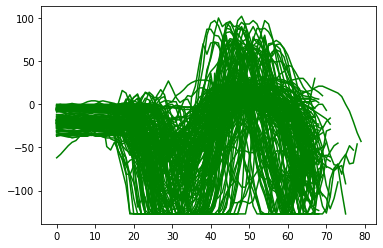

gx
156


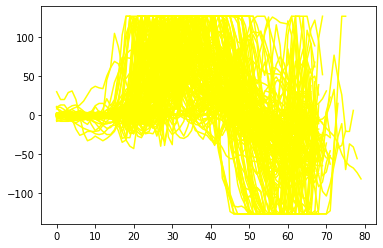

gy
156


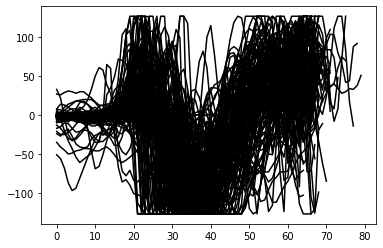

gz
156


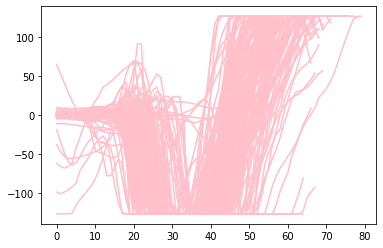

In [ ]:

import matplotlib.pyplot as plt
import numpy as np


shield = TOTAL_DATA[1]

ATTR = {0: "ax", 1: "ay", 2: "az", 3: "gx", 4: "gy", 5: "gz", 6: "tbuff"}
color = {0: "red", 1: "blue", 2: "green", 3: "yellow", 4: "black", 5: "pink"}
color2 = {0: "black", 1: "black", 2: "black", 3: "black", 4: "yellow", 5: "black"}

idx =0
for i in range(0, 6):
  print(ATTR[i])
  for gesture in shield:
    if i ==0:
      idx = idx + 1
    buffer=[]
    for datapoint in gesture:
          buffer.append(datapoint[i])
  # peaks_buf[attr%7].append(sum_peaks/10)
  # peaks2_buf[attr%7].append(sum_peaks2/10)
    plt.plot(np.array(buffer), color=color[i])

  print(idx)
  plt.show()

Visualise Data (Grenade)

ax
143


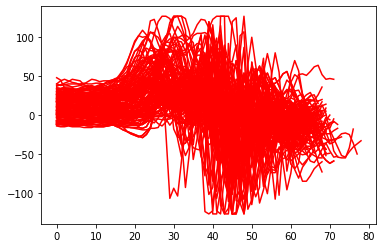

ay
143


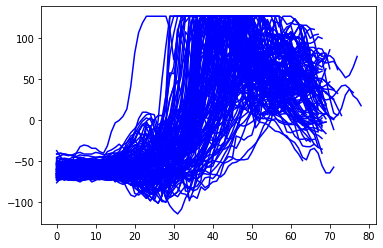

az
143


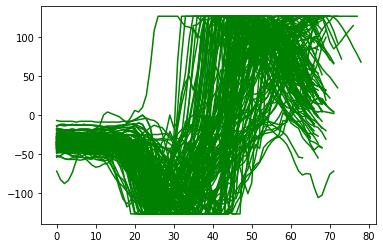

gx
143


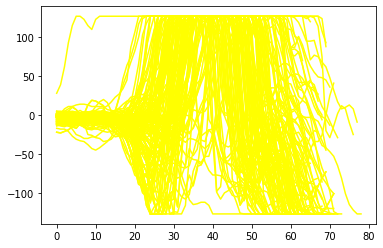

gy
143


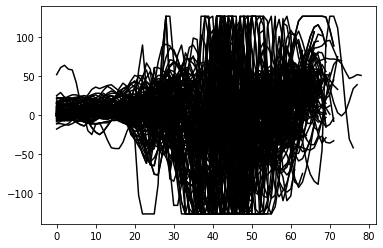

gz
143


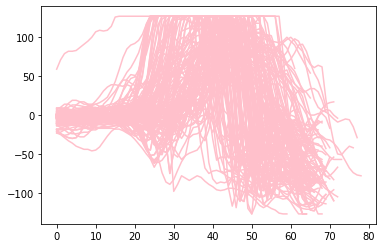

In [ ]:
grenade = TOTAL_DATA[2]

for i in range(0, 6):
  print(ATTR[i])
  for gesture in grenade:
    buffer=[]
    for datapoint in gesture:
          buffer.append(datapoint[i])
  # peaks_buf[attr%7].append(sum_peaks/10)
  # peaks2_buf[attr%7].append(sum_peaks2/10)
    plt.plot(np.array(buffer), color=color[i])

  print(len(grenade))
  plt.show()

Visualise Data (Reload)

ax
156


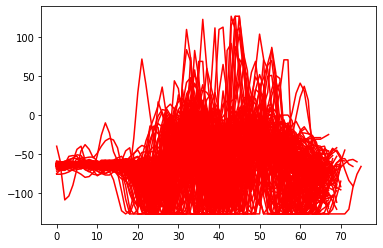

ay
156


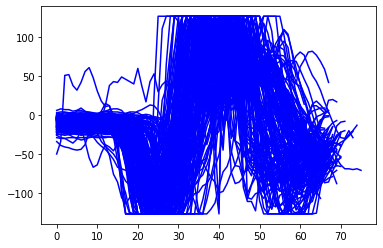

az
156


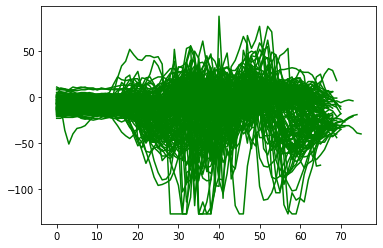

gx
156


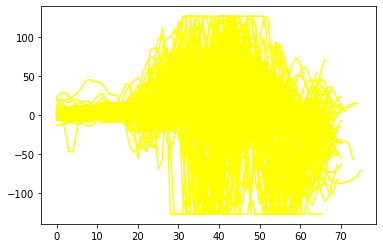

gy
156


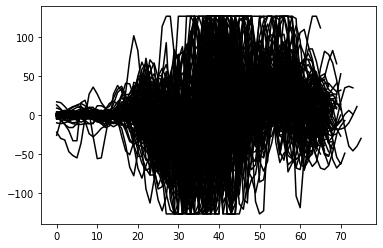

gz
156


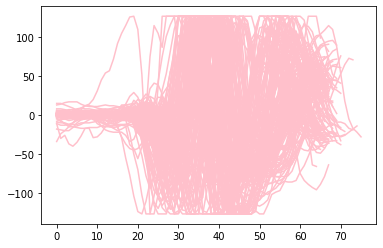

In [ ]:
reload = TOTAL_DATA[3]
for i in range(0, 6):
  print(ATTR[i])
  for gesture in reload:
    buffer=[]
    for datapoint in gesture:
          buffer.append(datapoint[i])
  # peaks_buf[attr%7].append(sum_peaks/10)
  # peaks2_buf[attr%7].append(sum_peaks2/10)
    plt.plot(np.array(buffer), color=color[i])

  print(len(reload))
  plt.show()

Visualise Data (Logout)

ax
195


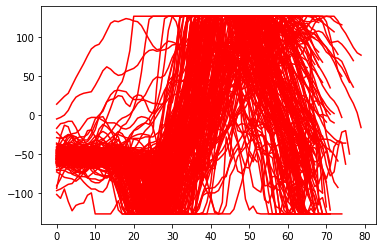

ay
195


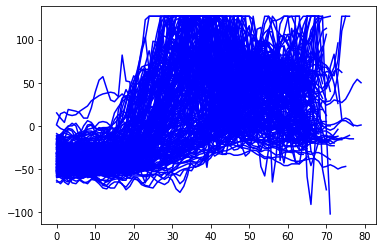

az
195


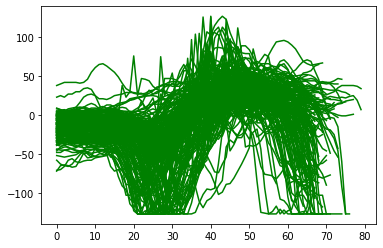

gx
195


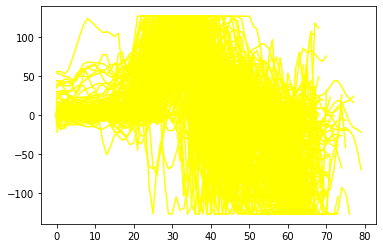

gy
195


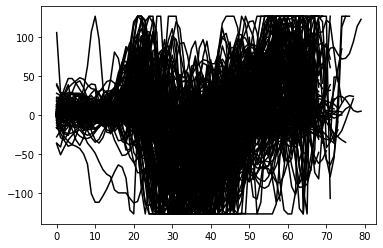

gz
195


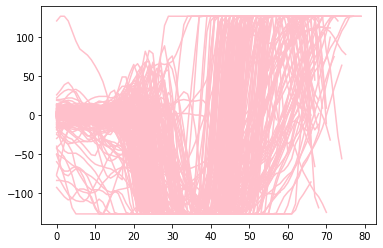

In [ ]:
logout = TOTAL_DATA[4]
for i in range(0, 6):
  print(ATTR[i])
  for gesture in logout:
    buffer=[]
    idx = 0
    for datapoint in gesture:
          idx = idx + 1
          if idx < 81:
            buffer.append(datapoint[i])
  # peaks_buf[attr%7].append(sum_peaks/10)
  # peaks2_buf[attr%7].append(sum_peaks2/10)
    plt.plot(np.array(buffer), color=color[i])

  print(len(logout))
  plt.show()


Visualise Data (Non-Gesture)

ax
209


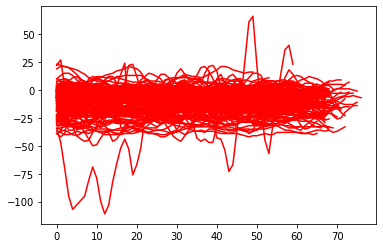

ay
209


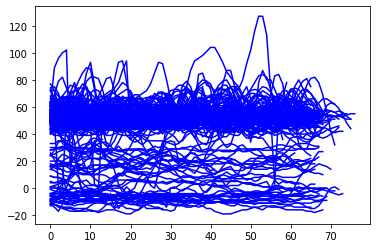

az
209


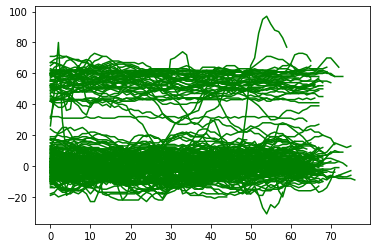

gx
209


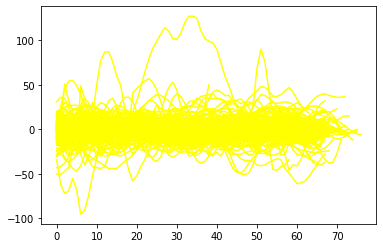

gy
209


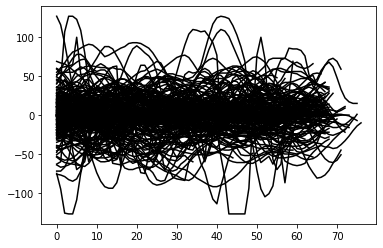

gz
209


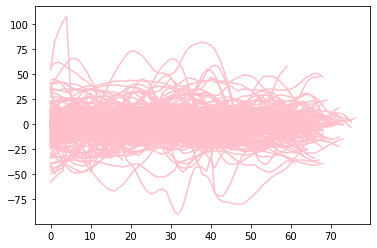

In [ ]:
nongesture = TOTAL_DATA[0]
for i in range(0, 6):
  print(ATTR[i])
  for gesture in nongesture:
    buffer=[]
    for datapoint in gesture:
          buffer.append(datapoint[i])
  # peaks_buf[attr%7].append(sum_peaks/10)
  # peaks2_buf[attr%7].append(sum_peaks2/10)
    plt.plot(np.array(buffer), color=color[i])

  print(len(nongesture))
  plt.show()

Extract Features

In [ ]:
import time 
import pandas as pd
import numpy as np
from scipy import stats
import math
import time
from scipy.fft import fft, fftfreq
import csv
SAMPLE_RATE = 77
DURATION = 1
N_SAMPLE = SAMPLE_RATE * DURATION

f_out = open("features_int3.csv", "w", newline = "", encoding="utf-8")

csvwriter = csv.writer(f_out)
csvwriter.writerow(["min ax", "max ax", "mean ax", "median ax", "mad ax", "sd ax", "iqr ax", "entropy ax", "rms ax", "range_ax", "avg magf ax", "madf ax", "tdiff ax",\
                    "min ay", "max ay", "mean ay", "median ay", "mad ay", "sd ay", "iqr ay", "entropy ay", "rms ay", "range_ay", "avg magf ay", "madf ay",  "tdiff ay", \
                    "min az", "max az", "mean az", "median az", "mad az", "sd az", "iqr az", "entropy az",  "rms az", "range_az","avg magf az", "madf az",  "tdiff az",  \
                    "min gx", "max gx", "mean gx", "median gx", "mad gx", "sd gx", "iqr gx", "entropy gx",  "rms gx", "range_gx", "avg magf gx", "madf gx",  "tdiff gx", \
                    "min gy", "max gy", "mean gy", "median gy", "mad gy", "sd gy", "iqr gy", "entropy gy", "rms gy", "range_gy", "avg magf gy", "madf gy",  "tdiff gy", \
                    "min gz", "max gz", "mean gz", "median gz", "mad gz", "sd gz", "iqr gz", "entropy gz", "rms gz",  "range_gz","avg magf gz", "madf gz",  "tdiff gz", \
                    "corr ax ay", "corr ax az", "corr ax gx", "corr ax gy", "corr ax gz", "corr ay az", "corr ay gx", "corr ay gy", "corr ay gz",  "corr az gx", "corr az gy",\
                    "corr az gz",  "corr gx gy", "corr gx gz", "corr gy gz", \
                    "label"])

min_buf = []
max_buf = []
mean_buf = []
median_buf = []
mad_buf = []
sd_buf = []
iqr_buf = []
entropy_buf = []
skew_buf = []
kurt_buf = []
rms_buf = []
range_buf = []
avg_magf_buf = []
madf_buf = []
tdiff = []
i_min = []
i_max = []
time_elapsed = []
corr_buf = []

for gidx in range(0, 5):
  gesture_data = TOTAL_DATA[gidx]
  for datapoint in gesture_data:
    buffer = [[],[],[],[],[],[]]
    for k in range(len(datapoint)):
      for j in range(0, 6):
        buffer[j].append(datapoint[k][j])
    start = time.time()    
    for j in range(0, 6):
      for i in range(j+1, 6):
        corr = np.corrcoef(buffer[j], buffer[i])
        corr_buf.append(corr[0,1])
    for j in range(0, 6):
      data = buffer[j]
      f_v = {}
        # each data is 1s window of one attr
      for item in data:
        if item in f_v:
          f_v[item] =  f_v[item] + 1
        else:
          f_v[item] = 1
      N = len(data)

      min_buf.append(min(data))
      max_buf.append(max(data))
      i_min.append(np.argmin(data))
      i_max.append(np.argmax(data))
      range_buf.append(max(data) - min(data))

      # print("min: " + str(min_v))
      # print("max: " + str(max_v))


      mean = np.mean(data)
      mean_buf.append(mean)

      median = np.median(data)
      median_buf.append(median)

      q3, q1 = np.percentile(np.array(data), [75 ,25])
      iqr = q3 - q1
      iqr_buf.append(iqr)

      n2 = 0
      n3 = 0
      n4 = 0
      h = 0
      mad = 0
      rms = 0

      for item in data:
        rms = rms + item**2
        n2 = (item - mean)**2 + n2
        n3 = (item - mean)**3 + n3
        n4 = (item - mean)**4 + n4
        mad = abs(item - mean) + mad
        p_i = f_v[item]/N

        h = p_i * math.log(p_i, 2) + h

      variance = n2 / (N - 1)
      sd = math.sqrt(variance)
      sd_buf.append(sd)

      # print("sd: " + str(sd)) 
      mad = mad / N
      mad_buf.append(mad)

      rms = math.sqrt(rms/N)
      rms_buf.append(rms)

      entropy_buf.append(-1*h)
      skew = (n3/N)/ math.pow((n2/N), 1.5)
      skew_buf.append(skew)

      kurt = (n4/N)/ (n2/N)**2 - 3
      kurt_buf.append(kurt)
      yf = fft(np.array(data))
      xf = fftfreq(N, 1 / SAMPLE_RATE)
      avg_magf= 0
      for i in range(len(xf)):
        avg_magf = np.abs(yf[i]) + avg_magf
      avg_magf = avg_magf/len(xf)
      avg_magf_buf.append(avg_magf)

      madf = 0
      for i in range(len(xf)):
        madf = madf + abs(np.abs(yf[i]) - mean)
      madf = madf / len(xf)
      madf_buf.append(madf)
      
    
    all = []
    for i in range(len(i_min)):
        tdiff.append(i_max[i] - i_min[i])
        

    for i in range (len(min_buf)):
      all.append(round(min_buf[i]))
      all.append(round(max_buf[i]))
      all.append(round(mean_buf[i]))
      all.append(round(median_buf[i]))
      all.append(round(mad_buf[i]))
      all.append(round(sd_buf[i]))
      all.append(round(iqr_buf[i]))
      all.append(round(entropy_buf[i]))
      all.append(round(rms_buf[i]))
      all.append(round(range_buf[i]))
      all.append(round(avg_magf_buf[i]))
      all.append(round(madf_buf[i]))
      all.append(round(tdiff[i]))
    for item in corr_buf:
      if math.isnan(item):
        item = 0
      all.append(round(item* 10**2))
    all.append(gidx)
    
    print(all)
    end = time.time()
    time_elapsed.append(end-start)
    csvwriter.writerow(all)
    i_min = []
    i_max = []

    min_buf = []
    max_buf = []
    mean_buf = []
    median_buf = []
    mad_buf = []
    sd_buf = []
    tdiff = []
    iqr_buf = []
    entropy_buf = []
    skew_buf = []
    kurt_buf = []
    rms_buf = []
    range_buf= []
    avg_magf_buf = []
    madf_buf = []
    t_diff = []
    corr_buf = []

print("Avg time elapsed: " + str(np.mean(time_elapsed)))
f_out.close()
    

[-21, 2, -13, -16, 7, 8, 14, 20, 15, 23, 39, 52, -47, 0, 28, 13, 9, 7, 8, 14, 17, 15, 28, 47, 36, -51, 55, 61, 58, 58, 2, 2, 3, 30, 58, 6, 68, 103, 25, -25, 0, -10, -8, 5, 7, 10, 17, 12, 25, 33, 43, -27, -3, 30, 9, 3, 9, 11, 17, 17, 14, 33, 40, 35, -33, 0, 14, 7, 7, 4, 4, 6, 22, 8, 14, 24, 20, 30, 86, -56, 14, 35, -48, -60, -16, 59, -31, -16, -17, 21, -82, -73, 52, 0]
[-22, -14, -18, -18, 1, 2, 2, 29, 18, 8, 27, 45, 47, -10, 0, -4, -4, 2, 3, 3, 25, 5, 10, 16, 20, -5, 55, 67, 61, 61, 2, 3, 5, 24, 61, 12, 75, 107, -31, -4, 9, 2, 2, 2, 3, 4, 23, 4, 13, 16, 14, 36, -3, 3, 0, 0, 1, 1, 1, 31, 1, 6, 7, 7, -24, -14, 8, -7, -9, 5, 6, 9, 18, 9, 22, 26, 33, -32, 44, -31, -31, -42, -21, 58, -19, -52, -10, 22, -26, 20, 1, -27, -1, 0]
[-21, -15, -18, -18, 1, 1, 2, 30, 18, 6, 26, 44, 6, -9, 0, -5, -4, 1, 2, 2, 27, 5, 9, 14, 18, -7, 54, 66, 60, 60, 2, 3, 2, 26, 60, 12, 71, 109, 9, -7, 6, 0, 0, 2, 3, 2, 26, 3, 13, 11, 11, 7, -2, 2, 0, 0, 0, 1, 0, 23, 1, 4, 5, 5, 19, -5, 2, -1, -1, 1, 2, 2, 29, 2, 7, 11

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: RuntimeWarning: invalid value encountered in double_scalars


[-19, 12, -4, -6, 7, 9, 10, 11, 10, 31, 29, 32, 11, 34, 82, 55, 54, 9, 12, 14, 9, 57, 48, 93, 109, -6, -8, 14, 4, 3, 5, 6, 9, 11, 7, 22, 24, 20, 23, -21, 14, -5, -5, 7, 9, 12, 8, 10, 35, 34, 39, 7, 4, 60, 30, 28, 12, 15, 18, 8, 33, 56, 78, 70, 9, -21, 27, 5, 6, 13, 15, 26, 7, 16, 48, 58, 53, -26, 29, 46, -55, -7, -35, -55, -45, 23, 45, 20, -31, -74, 6, 2, 18, 0]
[-14, 1, -7, -8, 4, 5, 6, 19, 8, 15, 23, 30, 29, 48, 61, 55, 55, 3, 3, 5, 20, 55, 13, 73, 94, -63, -6, 13, 3, 4, 5, 6, 9, 16, 7, 19, 21, 18, 45, -15, 8, -5, -5, 5, 5, 9, 16, 8, 23, 27, 32, -13, -19, 26, -2, -8, 14, 16, 31, 12, 16, 45, 41, 43, -22, -27, 23, -8, -12, 12, 14, 24, 11, 16, 50, 60, 68, -48, -6, 87, -19, -43, -65, -3, -8, 36, 34, 22, -56, -62, -32, 7, 88, 0]
[-13, 0, -5, -5, 4, 4, 8, 22, 7, 13, 21, 26, 24, 45, 64, 52, 52, 3, 4, 6, 19, 52, 19, 72, 91, -6, -5, 13, 7, 9, 5, 6, 10, 23, 9, 18, 31, 24, 48, -12, 8, -5, -5, 4, 5, 6, 18, 7, 20, 29, 33, 6, -30, 25, -4, -9, 13, 15, 24, 11, 15, 55, 66, 70, -12, -19, 12, -4, 0, 9,

Check Correlation

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('features_int3.csv') #Replace it with your path where the data file is stored
df.head()
df.describe()
correlation = df.corr()
pd.set_option('display.max_rows', None)
print(correlation['label'])


# plt.figure(figsize=(73,73))
# sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

# plt.title('Correlation between different features')

min ax        -0.656466
max ax         0.574839
mean ax       -0.184144
median ax     -0.551588
mad ax         0.690788
sd ax          0.680181
iqr ax         0.634598
entropy ax    -0.499144
rms ax         0.780757
range_ax       0.692766
avg magf ax    0.721205
madf ax        0.703360
tdiff ax       0.154476
min ay        -0.683610
max ay         0.214595
mean ay       -0.580172
median ay     -0.478794
mad ay         0.565862
sd ay          0.575342
iqr ay         0.547271
entropy ay    -0.531043
rms ay         0.009848
range_ay       0.588428
avg magf ay    0.508606
madf ay        0.507982
tdiff ay       0.504794
min az        -0.394895
max az         0.219627
mean az       -0.166159
median az     -0.234314
mad az         0.246654
sd az          0.266111
iqr az         0.176832
entropy az    -0.559118
rms az         0.087313
range_az       0.360820
avg magf az    0.265147
madf az        0.215290
tdiff az       0.065898
min gx        -0.464207
max gx         0.567771
mean gx        0

Check GPU Usage

In [ ]:
# Check if runtime uses GPU
import torch

gpu_name = torch.cuda.get_device_name(0)

print("Using GPU", gpu_name)

Using GPU Tesla P100-PCIE-16GB


Load Dataset

In [ ]:

# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.utils.data import Dataset
from torch.utils.data import Sampler
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Dropout
from torch.optim import Adam, SGD
import tensorflow as tf
from torchvision import transforms
from torchvision.transforms import *
from sklearn.utils import shuffle

datasets = pd.read_csv('features_int3.csv')
datasets.dropna()
datasets = shuffle(datasets)


# train_set, test_set = train_test_split(datasets, test_size = 0.1)
# train_set = train_set.dropna()

# print(len(train_set))


# test_set, val_set = train_test_split(test_set, test_size = 0.5)
# test_set.dropna()
# val_set.dropna()

k_fold = 10
seg = round(1/k_fold * len(datasets))
class MyDataset(Dataset):
  
    def __init__(self, type, k):

      # # compute k_fold segments
      val_l = int(seg * k)
      val_r = int(val_l + seg)

      test_set = datasets.iloc[val_l:val_r]
      train_set = datasets
      training_set = train_set.drop(test_set.index)
      if type == "train":
        self.data = training_set
      elif type == "test":
        self.data = test_set
      # elif type == "val":
      #   self.data = val_set
      print(f'loaded data with dataset size {len(self)}')
      # print("Val left index: " + str(val_l))
      # print("Val right index: " + str(val_r))
 
      
    def __getitem__(self, idx):
        classes = 5
        # print(self.data.iloc[idx])
        # sys.stdout.flush()
        item = self.data.iloc[idx] 
        # image = []
        # for index in CORR_FEATURES:
        #   image.append(item[index])
        image = item[0:93]

        label = item[93]
        image = torch.from_numpy(np.array(image))
        labels = []
        for i in range(classes):
            if i == label:
              labels.append(1)
            else:
              labels.append(0)
        labels = torch.IntTensor(labels)
        return image, labels

    def __len__(self):
        return len(self.data)


MLP Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class Model(nn.Module):
  
  def __init__(self):
    super(Model, self).__init__()
    n_input = 93
    n_h1 = 512
    n_h2 = 256
    n_h3 = 64
    n_output = 5

    self.h1 = nn.Linear(n_input, n_h1)
    self.h2 = nn.Linear(n_h1, n_h2)
    self.h3 = nn.Linear(n_h2, n_h3)
    self.output = nn.Linear(n_h3, n_output)

    print(self)
  
  def forward(self, x):
    x = F.relu(self.h1(x))
    x = F.relu(self.h2(x))
    x = F.relu(self.h3(x))
    x = self.output(x)
    return x


Train Model

In [ ]:
from torch import optim
from sklearn.model_selection import StratifiedKFold

confusion_matrix = [[0,0, 0,0, 0], [0,0,0, 0, 0], [0,0,0, 0, 0], [0,0,0, 0, 0], [0,0,0, 0, 0]]
def accuracy_score(outputs, targets):
  sum = 0
  batch_size = targets.size(0)
  global confusion_matrix
  for i in range(batch_size):
    index_O = outputs.cpu().data.numpy()[i].argmax()
    index_T = targets.cpu().data.numpy()[i].argmax()
    confusion_matrix[index_O][index_T] = confusion_matrix[index_O][index_T] + 1

    if index_O == index_T:
      sum = sum + 1
  return sum / batch_size

def train():
  batch_size = 1
  num_epochs = 50
  num_workers = 2

  train_score = []
  test_score = []
  for k in range(k_fold):
    print("Doing K-fold: " + str(k))
    global confusion_matrix
    model = Model()
    model = model.cuda().float()
   
    loss_fn = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(),lr = 0.000008, momentum= 0.9, nesterov = True)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=1, factor=0.3, verbose=True)
    
    train_set = MyDataset("train", k)
    validation_set = MyDataset("test", k)

    train_loader = torch.utils.data.DataLoader(
          train_set, batch_size=batch_size, num_workers=num_workers, pin_memory=True, shuffle=True)
    validation_loader = torch.utils.data.DataLoader(
          validation_set, batch_size=batch_size, num_workers=num_workers, pin_memory=True, shuffle=False)

    for epoch in range(num_epochs):
      train_loss, valid_loss = [], []
      train_acc , val_acc = [], []
      # train
      model.train()

      # #quantize model
      # model.qconfig = torch.quantization.get_default_qat_qconfig('fbgemm')
      # model = torch.quantization.prepare_qat(model, inplace=True)

      for i, (data, target) in enumerate(train_loader):
          data, target = data.cuda().float(), target.cuda().float()
          # clear gradients
          optimizer.zero_grad()

          # forward prop
          prediction = model(data)

          # loss calculation
          loss = loss_fn(prediction, target)

          #backward prop
          loss.backward()

          ## weight optimization
          optimizer.step()
  
          train_loss.append(loss.item())
          train_acc.append(accuracy_score(prediction, target))

          # if i % 100 == 99:
          #         print(f'training: iteration {i} / {len(train_loader)}, avg train loss = {np.mean(train_loss):.4f}, '
          #               f'train accuracy {np.mean(train_acc):.4f}')
      
      # eval
      model.eval()
      for i, (data, target) in enumerate(validation_loader):
          data, target = data.cuda().float(), target.cuda().float()
          prediction = model(data)
          loss = loss_fn(prediction, target)
          valid_loss.append(loss.item())
          val_acc.append(accuracy_score(prediction, target))

          # if i % 100 == 99:
          #         print(f'validation: iteration {i} / {len(validation_loader)}, avg val loss = {np.mean(valid_loss):.4f}, '
          #               f'val accuracy {np.mean(val_acc):.4f}')

      # epoch summary
      print("Epoch:", epoch, "Train Loss:", np.mean(train_loss), "Train acc:", np.mean(train_acc), "Val Loss:", np.mean(valid_loss), "Val Acc:",  np.mean(val_acc), "Confusion matrix: " , confusion_matrix)
      confusion_matrix = [[0,0, 0,0, 0], [0,0,0, 0, 0], [0,0,0, 0, 0], [0,0,0, 0, 0], [0,0,0, 0, 0]]
      # lr scheduler
      scheduler.step(np.mean(valid_loss))

      # # checkpoint
      # if epoch % 2 == 10:
      #     torch.save(model.state_dict(), f'ckpt_e{epoch}.pth')
      
    torch.save(model.state_dict(), 'Model' + str(k) +'.pth')
    train_score.append(np.mean(train_acc))
    test_score.append(np.mean(val_acc))



  

if __name__ == "__main__":
    train()


Doing K-fold: 0
Model(
  (h1): Linear(in_features=93, out_features=512, bias=True)
  (h2): Linear(in_features=512, out_features=256, bias=True)
  (h3): Linear(in_features=256, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=5, bias=True)
)
loaded data with dataset size 773
loaded data with dataset size 86
Epoch: 0 Train Loss: 0.2717191512578373 Train acc: 0.7115135834411385 Val Loss: 0.09735658119952437 Val Acc: 0.872093023255814 Confusion matrix:  [[101, 0, 3, 0, 0], [37, 116, 9, 1, 20], [42, 8, 122, 6, 10], [12, 4, 4, 140, 19], [17, 28, 5, 9, 146]]
Epoch: 1 Train Loss: 0.08085032536275925 Train acc: 0.9340232858990944 Val Loss: 0.05872342627235623 Val Acc: 0.9767441860465116 Confusion matrix:  [[179, 0, 0, 0, 0], [16, 149, 1, 1, 7], [5, 1, 142, 0, 2], [1, 0, 0, 155, 5], [8, 6, 0, 0, 181]]
Epoch: 2 Train Loss: 0.05889433296909375 Train acc: 0.9728331177231565 Val Loss: 0.05659578823441163 Val Acc: 0.9883720930232558 Confusion matrix:  [[199, 0, 0, 0, 0], [5

In [ ]:
from torch import nn
import torch
import torch.quantization.quantize_fx as quantize_fx
import copy
import csv


modelnum = 9
my_model = Model()
my_model = my_model.cuda()
my_model.eval()
my_model.load_state_dict(torch.load('Model' + str(modelnum)+ '.pth'))


w1 = []
w2 = []
w3 = []
w4 = []

b1 = []

b2 = []
b3 = []
b4 = []


n_input = 93
n_h1 = 512
n_h2 = 256
n_h3 = 64

n_output = 5

confusion_matrix = [[0,0, 0,0, 0], [0,0,0, 0, 0], [0,0,0, 0, 0], [0,0,0, 0, 0],  [0,0,0, 0, 0]]
for param_tensor in my_model.state_dict():
    # get each layer, print layer size
    print(param_tensor, "\t", my_model.state_dict()[param_tensor].size())
    print("\n")
    print(param_tensor, "\t", my_model.state_dict()[param_tensor])
    print("\n")

    # prepare min,max of each layer
    layer = my_model.state_dict()[param_tensor]

    out = []

    
    r = 0
  

    if param_tensor == 'h1.weight' or param_tensor == 'h2.weight'  or param_tensor == 'h3.weight' or param_tensor == 'output.weight' or param_tensor == "h4.weight":
      #layer is 2D array
      for row in layer:
        r = r + 1
        for item in row:
          y = item.item() * (10**3)
          out.append(round(y))
          if param_tensor == 'h1.weight':
            w1.append(round(y))
          elif param_tensor == 'h2.weight':
            w2.append(round(y))
          elif param_tensor == 'h3.weight':
            w3.append(round(y))
          else:
            w4.append(round(y))
          

      
    else:
      # layer is 1D array
      for item in layer:
          r = r + 1
          y = item.item() * (10**3)
          
          out.append(round(y))
          if param_tensor == 'h1.bias':
            b1.append(round(y))
          elif param_tensor == 'h2.bias':
            b2.append(round(y))
          elif param_tensor == 'h3.bias':
            b3.append(round(y))
          else:
            b4.append(round(y))

    print(r)
    print(out)
    
    print("\n")


#  compute accuracy of quantized weights
test_acc = []
for i in range(k_fold):

  test_set = MyDataset("test",i)
  batch_size = 64


  # mp.set_start_method('spawn', force=True)
  test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, \
                    shuffle=False)

  # test accuracy
  



  for k, (image,label) in enumerate(test_loader):
          
          acc = 0
          idx = 0
          preds = []
          for data in image:
            z1 = []
            z2 = []
            z3 = []
            z4 = []
            z5 = []
            # 24 attr, 64 data
            # compute Z1 = W1x + b1
            j = 0
            z = 0
            x = data.numpy()
            for i in range(0, n_h1 * n_input):
              z = w1[i] * x[i%n_input] + z
              if i% n_input == n_input - 1:
                z = z + b1[j]
                j = j + 1
                if z < 0:
                  z = 0
                z1. append(round(z/1000))
                z = 0
            

            # compute z2 = w2 * z1 + b2
            j = 0
            z = 0
            for i in range(0, n_h2 * n_h1):
              z = w2[i] * z1[i%n_h1] + z
              if i% n_h1 == n_h1 - 1:
                z = z + b2[j]
                j = j + 1
                if z < 0:
                  z = 0
                z2.append(round(z/1000))
                z = 0 
            
            j = 0
            z = 0
            for i in range(0, n_h3 * n_h2):
              z = w3[i] * z2[i%n_h2] + z
              if i% n_h2 == n_h2 - 1:
                z = z + b3[j]
                j = j + 1
                if z < 0:
                  z = 0
                z3.append(round(z/1000))
                z = 0 

            j = 0
            z = 0
            for i in range(0, n_output * n_h3):
              z = w4[i] * z3[i%n_h3] + z
              if i% n_h3 == n_h3-1:
                z = z + b4[j]
                j = j + 1
                if z < 0:
                  z = 0
            
                z4.append(round(z))
                z = 0 

            # j = 0
            # z = 0
            # for i in range(0, n_output * n_h4):
            #   z = w5[i] * z4[i%n_h4] + z
            #   if i% n_h4 == n_h4-1:
            #     z = z + b5[j]
            #     j = j + 1
            #     if z < 0:
            #       z = 0
                
            #     z5.append(round(z))
            #     z = 0 
            
          
            pred = np.argmax(np.asarray(z4))
            preds.append(pred)

          sum = 0
          for i in range(label.size(0)):
            i_o = preds[i]
            i_t = np.argmax(label[i].numpy())
            confusion_matrix[i_o][i_t] = confusion_matrix[i_o][i_t] + 1
            if i_o == i_t:
              sum = sum + 1
          test_acc.append(sum/label.size(0))
          print(sum/label.size(0))
print(np.mean(test_acc))  
print(confusion_matrix)

Model(
  (h1): Linear(in_features=93, out_features=512, bias=True)
  (h2): Linear(in_features=512, out_features=256, bias=True)
  (h3): Linear(in_features=256, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=5, bias=True)
)
h1.weight 	 torch.Size([512, 93])


h1.weight 	 tensor([[-0.0985,  0.0483, -0.0899,  ...,  0.0866,  0.0873,  0.0871],
        [ 0.0951, -0.0055,  0.0966,  ..., -0.0680, -0.0961,  0.0231],
        [-0.0800,  0.0417, -0.0224,  ...,  0.0830,  0.0814,  0.0628],
        ...,
        [-0.0155,  0.0199, -0.0446,  ...,  0.0290,  0.0748,  0.0773],
        [ 0.0875,  0.0033,  0.0777,  ..., -0.0126,  0.0228,  0.0605],
        [-0.0502, -0.0827, -0.0676,  ...,  0.0662, -0.0771,  0.0123]],
       device='cuda:0')


512
[-99, 48, -90, 102, 56, -38, 68, 81, 58, -75, 27, 34, 54, -64, -18, 48, -1, -73, 76, 69, 62, 26, 39, -63, 64, -76, 53, 81, -55, -19, 92, 55, -83, -64, 35, -26, -71, -34, 29, 91, -60, -77, -6, 74, 55, 91, 61, -75, 92, -29, -95, -59, 89, 

In [ ]:

grenade = ["nizargrenade.txt", "tejasgrenade.txt", "zihaogrenade.txt"]
reload = ["nizarreload.txt", "tejasreload.txt", "zihaoreload.txt"]
shield = ["nizarshield.txt", "tejasshield.txt", "zihaoshield.txt"]
logout = ["nizarwave.txt", "tejaswave.txt", "zihaowave.txt"]
nongesture = ["nizarnongesture.txt", "tejasnongesture.txt", "zihaonongesture.txt"]

data = ""
for item in grenade:
  f = open(item)
  data2 = f.read()
  data = data + "\n" + data2 + "\n"

f = open("grenade.txt", "w")
f.write(data)

data = ""
for item in reload:
  f = open(item)
  data2 = f.read()
  data = data + "\n" + data2 + "\n"

f = open("reload.txt", "w")
f.write(data)
data = ""
f.write(data)
for item in shield:
  f = open(item)
  data2 = f.read()
  data = data + "\n" + data2 + "\n"

f = open("shield.txt", "w")
f.write(data)

data =""
for item in logout:
  f = open(item)
  data2 = f.read()
  data = data + "\n" + data2 + "\n"

f = open("wave.txt", "w")
f.write(data)

data =""
for item in nongesture:
  f = open(item)
  data2 = f.read()
  data = data + "\n" + data2 + "\n"

f = open("nongesture.txt", "w")
f.write(data)




310479